<a href="https://colab.research.google.com/github/Kingdms/Raw_house_data/blob/main/Another_copy_of_Raw_house_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install pandas numpy matplotlib seaborn openpyxl



In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [19]:
import pandas as pd
import numpy as np
from IPython.display import display
from matplotlib import pyplot as plt
import io
import base64
from google.colab import drive
from google.colab import files
import seaborn as sns

In [16]:
path="/content/drive/MyDrive/raw_house_data.csv"
df = pd.read_csv(path)
df.head()

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
0,21530491,5300000.0,85637,-110.378200,31.356362,2154.00,5272.00,1941,13,10.0,10500.0,0.0,"Dishwasher, Freezer, Refrigerator, Oven",6,"Mexican Tile, Wood",0
1,21529082,4200000.0,85646,-111.045371,31.594213,1707.00,10422.36,1997,2,2.0,7300.0,0.0,"Dishwasher, Garbage Disposal",5,"Natural Stone, Other",0
2,3054672,4200000.0,85646,-111.040707,31.594844,1707.00,10482.00,1997,2,3.0,NaN,NaN,"Dishwasher, Garbage Disposal, Refrigerator",5,"Natural Stone, Other: Rock",NaN
3,21919321,4500000.0,85646,-111.035925,31.645878,636.67,8418.58,1930,7,5.0,9019.0,4.0,"Dishwasher, Double Sink, Pantry: Butler, Refri...",4,"Ceramic Tile, Laminate, Wood",NaN
4,21306357,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995,4,6.0,6396.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5,"Carpet, Concrete",55


In [20]:
display(df.shape)

(5000, 16)

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MLS               5000 non-null   int64  
 1   sold_price        5000 non-null   float64
 2   zipcode           5000 non-null   int64  
 3   longitude         5000 non-null   float64
 4   latitude          5000 non-null   float64
 5   lot_acres         4990 non-null   float64
 6   taxes             5000 non-null   float64
 7   year_built        5000 non-null   int64  
 8   bedrooms          5000 non-null   int64  
 9   bathrooms         4994 non-null   float64
 10  sqrt_ft           4944 non-null   float64
 11  garage            4993 non-null   float64
 12  kitchen_features  4967 non-null   object 
 13  fireplaces        5000 non-null   object 
 14  floor_covering    4999 non-null   object 
 15  HOA               4438 non-null   object 
dtypes: float64(8), int64(4), object(4)
memory 

In [ ]:
df.describe(include='all')

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
count,5.000000e+03,5.000000e+03,5000.000000,5000.000000,5000.000000,4990.000000,5.000000e+03,5000.00000,5000.000000,4994.000000,4944.000000,4993.000000,4967,5000,4999,4438
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1871,11,310,380
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",1,"Carpet, Ceramic Tile",0
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1719,1806,1235,824
mean,2.127070e+07,7.746262e+05,85723.025600,-110.912107,32.308512,4.661317,9.402828e+03,1992.32800,3.933800,3.829896,3716.366828,2.816143,NaN,NaN,NaN,NaN
std,2.398508e+06,3.185556e+05,38.061712,0.120629,0.178028,51.685230,1.729385e+05,65.48614,1.245362,1.387063,1120.683515,1.192946,NaN,NaN,NaN,NaN
min,3.042851e+06,1.690000e+05,85118.000000,-112.520168,31.356362,0.000000,0.000000e+00,0.00000,1.000000,1.000000,1100.000000,0.000000,NaN,NaN,NaN,NaN
25%,2.140718e+07,5.850000e+05,85718.000000,-110.979260,32.277484,0.580000,4.803605e+03,1987.00000,3.000000,3.000000,3047.000000,2.000000,NaN,NaN,NaN,NaN
50%,2.161469e+07,6.750000e+05,85737.000000,-110.923420,32.318517,0.990000,6.223760e+03,1999.00000,4.000000,4.000000,3512.000000,3.000000,NaN,NaN,NaN,NaN
75%,2.180480e+07,8.350000e+05,85749.000000,-110.859078,32.394334,1.757500,8.082830e+03,2006.00000,4.000000,4.000000,4130.250000,3.000000,NaN,NaN,NaN,NaN


In [ ]:
df = df.replace(['None', 'none', ''], np.nan)


In [ ]:
df['sqrt_ft'] = pd.to_numeric(df['sqrt_ft'], errors='coerce')

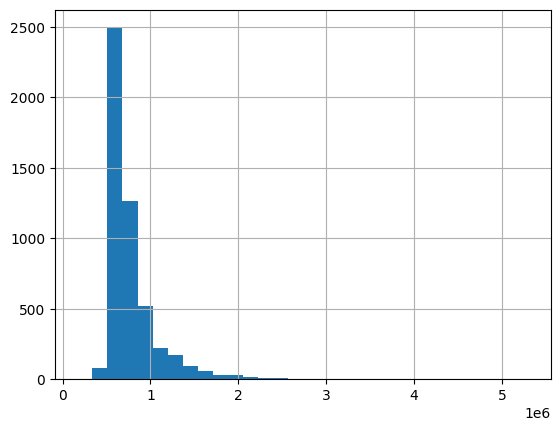

In [ ]:
df['sold_price'].hist(bins=30)
plt.show()

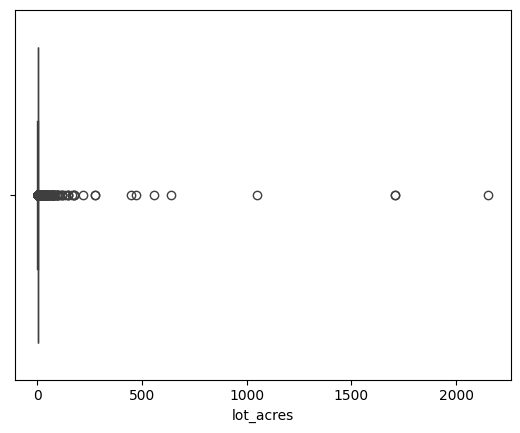

In [ ]:
sns.boxplot(x=df['lot_acres'])
plt.show()

In [ ]:
df['garage'].fillna(0, inplace=True)
df['sqrt_ft'].fillna(df['sqrt_ft'].median(), inplace=True)

/tmp/ipython-input-19-281371124.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['garage'].fillna(0, inplace=True)
/tmp/ipython-input-19-281371124.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.

In [ ]:
df=df[df['lot_acres']< 100]

In [ ]:
df.drop_duplicates(inplace= True)

In [ ]:
df.to_csv('clean_house_data.csv', index=False)

In [22]:

files.download('/content/drive/MyDrive/raw_house_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>